# 从0实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from torchvision import transforms
import torchvision

In [2]:
#加载数据集
batch_size=256
trans=transforms.ToTensor()
train_dataset=torchvision.datasets.FashionMNIST(root="C:/Users/Administrator/Desktop/datasets/fashionMnist_download",train=True,transform=trans,download=False)
test_dataset=torchvision.datasets.FashionMNIST(root="C:/Users/Administrator/Desktop/datasets/fashionMnist_download",train=False,transform=trans,download=False)
train_iter=torch.utils.data.DataLoader(train_dataset,batch_size,shuffle=True,num_workers=2)
test_iter=torch.utils.data.DataLoader(test_dataset,batch_size,shuffle=False,num_workers=2)

In [3]:
#定义丢弃层和模型
def dropout_layer(X,dropout):#输入数据和丢弃概率
    assert 0<=dropout<=1,"丢弃率必需是大于等于0小于等于1"
    if dropout==1:
        return torch.zeros(X.shape)
    if dropout==0:
        return X
    mask=(torch.randn(X.shape)>dropout).float() #生成一个X.shape的均值是0，方差是1的正态分布，然后大于dropout的元素值为1，小于dropout的值为0
    return X*mask/(1-dropout)
#用类定义一个模型,先relu再dropout
class Net(nn.Module):
    def __init__(self,dropout1,dropout2,is_training=True):
        super(Net,self).__init__()
        self.dropout1=dropout1
        self.dropout2=dropout2
        self.is_training=is_training
        self.linear1=nn.Linear(784,256)
        self.linear2=nn.Linear(256,256)
        self.linear3=nn.Linear(256,10)
        self.relu=nn.ReLU()
    def forward(self,X): #X输入是(batch_size,1，28，28)
        X=X.reshape(-1,784)
        X=self.relu(self.linear1(X))
        if self.is_training==True: #只有在训练的时候才启用dropout
            X=dropout_layer(X,self.dropout1)
        X=self.relu(self.linear2(X))
        if self.is_training==True:
            X=dropout_layer(X,self.dropout2)
        X=self.linear3(X)
        return X
model=Net(0.2,0.5)

In [4]:
#定义损失函数和优化器
loss=nn.CrossEntropyLoss()
trainer=torch.optim.SGD(model.parameters(),lr=0.5)

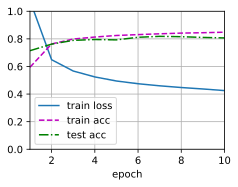

In [5]:
#训练过程
num_epochs=10
d2l.train_ch3(model,train_iter,test_iter,loss,num_epochs,trainer)

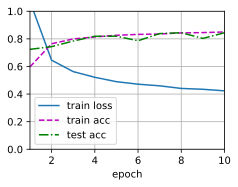

In [6]:
# 定义具有两个隐藏层的多层感知机，每个隐藏层包含256个单元
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10 ,256, 256

dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,is_training=True):       
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1,self.num_inputs))))
        if self.training == True: # 如果是在训练，则作用dropout，否则则不作用
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2,dropout2)
        out = self.lin3(H2) # 输出层不作用dropout
        return out
        
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

# 训练和测试
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

# 简洁实现 使用nn.Sequential实现

In [8]:
#直接定义模型
dropout1,dropout2=0.2,0.5
model=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Dropout(dropout1),nn.Linear(256,256),nn.ReLU(),nn.Dropout(dropout2),nn.Linear(256,10))
def init_weights(m): #初始化权重
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
model.apply(init_weights)
trainer=torch.optim.SGD(model.parameters(),lr=0.5)
loss=nn.CrossEntropyLoss()

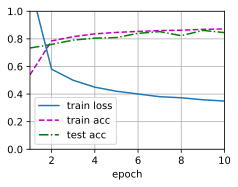

In [9]:
d2l.train_ch3(model,train_iter,test_iter,loss,num_epochs,trainer)